In [1]:
#importing the libraries
import plotly.express as px
from plotly.offline import plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
from datetime import datetime
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import json, requests
import calmap
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
#reading the data into a pandas dataframe
df = pd.read_csv('COVID19INDIA.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
# Get last date to see which states have the most cases currently
last_date = df['Date'].max()
states_data = df[ df['Date'] == last_date]
states_data = states_data.drop(['Latitude', 'Longitude', 'Date'], axis=1)
states_data.index = states_data['States']
states_data = states_data.drop(['States'], axis=1)
states_data.sort_values('Total Cases', ascending= False).style.background_gradient(cmap='BuPu')

,Death,Recovered,Total Cases,Active
States,,,,
Maharashtra,9250,118558,217121,89313
Tamil Nadu,1636,71116,118594,45842
Delhi,3165,74217,102831,25449
Gujarat,1977,26720,37550,8853
Uttar Pradesh,827,19627,29968,9514
Telangana,313,16287,27612,11012
Karnataka,416,11098,26815,15301
West Bengal,804,15790,23837,7243
Rajasthan,472,16575,21404,4357


In [4]:
# Get latest data to see heatmap
last_date = df['Date'].max()
latest_df = df[ df['Date'] == last_date]
latest_df.columns


latest_df = latest_df.fillna(0)

In [5]:
#generating a world map

world_map = folium.Map(location=[20,78], tiles="cartodbpositron", zoom_start=4,max_zoom=7,min_zoom=4)
    
for i in range(0,len(latest_df)):
    folium.Circle(
        location=[latest_df.iloc[i]['Latitude'], latest_df.iloc[i]['Longitude']],
        tooltip = "<h3 style='text-align:center;font-weight: bold'>"+latest_df.iloc[i]['States']+"</h3>"
        "<hr style='margin:10px;'>"
        "<ul style='color: #444; list-style-type:circle; align-item:left; padding-left:20px; padding-right:20px'>"
        "<li>Confirmed: "+str(latest_df.iloc[i,1])+"</li>"
        "<li>Deaths:   "+str(latest_df.iloc[i,3])+"</li>"
        "<li>Active:   "+str(latest_df.iloc[i,-1])+"</li>"
        "</ul>",
        radius = (int((np.log(latest_df.iloc[i,3]+1.00001)))+0.2)*50000,
        color='navy',
        fill_color='darkblue',
    fill=True).add_to(world_map)
 
world_map

#world_map.save('india_map.html')

## Calendar View

**Note**:The data was we scrapped on  21/04/2020, hence the historicals prior to this date will be missing in the representation.

In [6]:
calmap_data = df.copy().drop(['States','Latitude', 'Longitude'], axis=1)
calmap_data = calmap_data.groupby(['Date']).sum().diff()

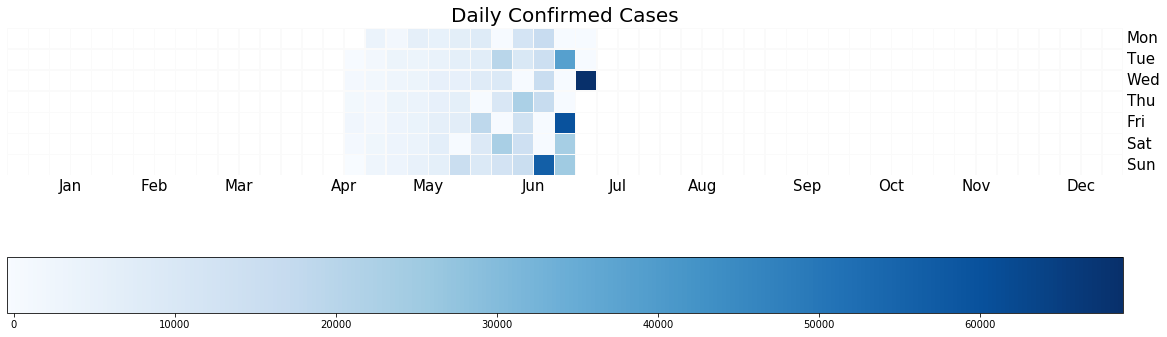

In [7]:
f = plt.figure(figsize=(20,10))
#f.add_subplot(2,1,1)
cax = calmap.yearplot(calmap_data['Total Cases'], fillcolor='white', cmap='Blues', linewidth=0.5,linecolor="#fafafa",year=2020)
plt.title("Daily Confirmed Cases",fontsize=20)
plt.tick_params(labelsize=15)
plt.colorbar(cax.get_children()[1], ax=cax, orientation='horizontal')
plt.show()
# Save the output as a PNG image
f.savefig("Daily_Confirmed_Case_CalenderView.png", dpi=100)

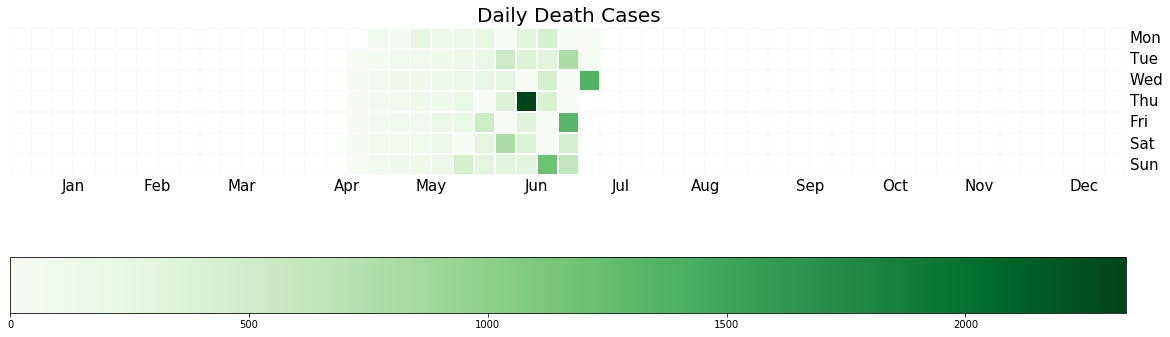

In [8]:
f = plt.figure(figsize=(20,10))
#f.add_subplot(2,1,2)
cax = calmap.yearplot(calmap_data['Death'], fillcolor='white', cmap='Greens', linewidth=1,linecolor="#fafafa",year=2020)
plt.title("Daily Death Cases",fontsize=20)
plt.tick_params(labelsize=15)
plt.colorbar(cax.get_children()[1], orientation='horizontal')
plt.show()
f.savefig("Daily_Deaths_CalenderView.png", dpi=100)

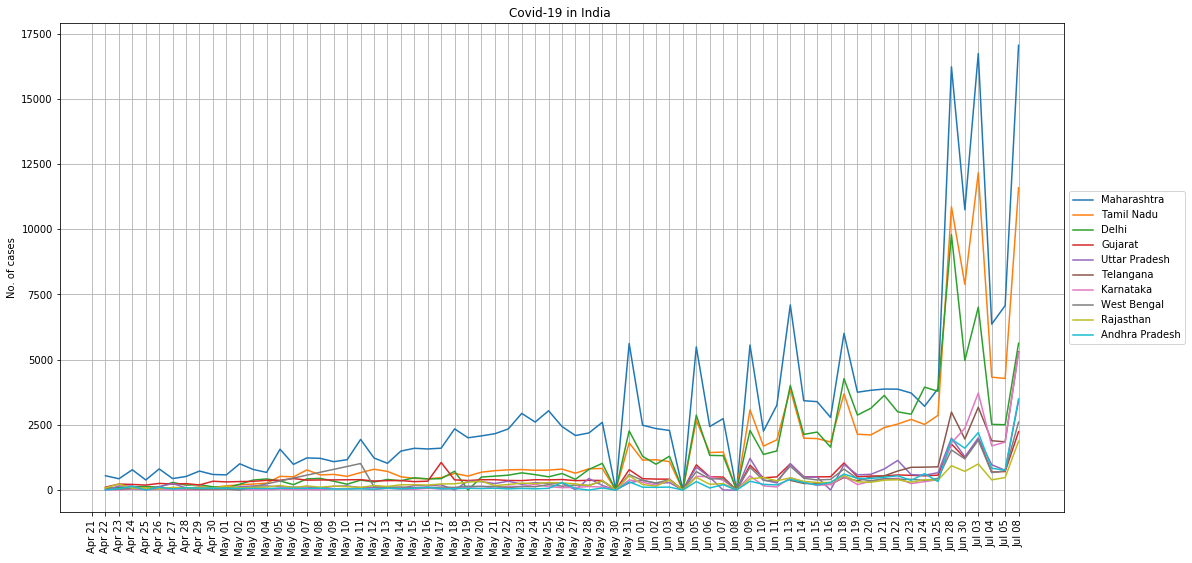

In [9]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

unique_states = df['States'].unique()

# Get last date to see which Countrys have the most cases currently
last_date = df['Date'].max()
df_last_date = df[ df['Date'] == last_date]
series_last_date = df_last_date.groupby('States')['Total Cases'].sum()
series_last_date = series_last_date.nlargest(10)

#print(series_last_date)
# start date
date_after = df['Date'].min()
#print(date_after)

for states in series_last_date.index:
    df_states = df[ df['States'] == states].copy()
    df_states['Date'] = pd.to_datetime(df_states['Date'])
    df_states = df_states[ df_states['Date'] >= date_after]

    series_states = df_states.groupby('Date')['Total Cases'].sum()
    series_states = series_states.diff()
    series_states.index = series_states.index.strftime('%b %d')
    plt.plot(series_states.index, series_states.values, label=states)

plt.ylabel("No. of cases")
plt.title('Covid-19 in India ')
plt.grid(True)

# rotate dates.
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
f.savefig("Daily_Case_Line_Chart.png", dpi=100)

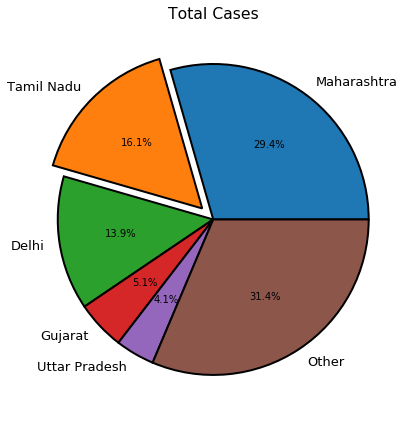

In [10]:
unique_states = df['States'].unique()
plt.style.use("seaborn-talk")


# Get last date to see which states have the most cases currently
last_date = df['Date'].max()
df_last_date = df[df['Date'] == last_date]
series_last_date = df_last_date.groupby('States')['Total Cases'].sum().sort_values(ascending=False)
#print(series_last_date)

labels = []
values = []
state_count = 5
other_total = 0
for state in series_last_date.index:
    if state_count > 0:
        labels.append(state)
        values.append(series_last_date[state])
        state_count -= 1
    else:
        other_total += series_last_date[state]
labels.append("Other")
values.append(other_total)

wedge_dict = {
    'edgecolor': 'black',
    'linewidth': 2        
}

explode = (0, 0.1, 0, 0, 0, 0)

plt.title("Total Cases")
plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', wedgeprops=wedge_dict)
plt.show()
f.savefig("Percentage of total cases.png", dpi=100)